### Multilinear Regression
Multilinear regression, commonly referred to as multiple linear regression, is a statistical technique that models the relationship between two or more explanatory variables and a response variable by fitting a linear equation to observed data. Essentially, it extends the simple linear regression model to incorporate multiple predictors, thereby providing a way to evaluate how multiple factors impact the outcome.

Assumptions in Multilinear Regression

1. Linearity: The relationship between the predictors and the response is linear.

2. Independence: Observations are independent of each other.

3. Homoscedasticity: The residuals (differences between observed and predicted values) exhibit constant variance at all levels of the predictor.

4. Normal Distribution of Errors: The residuals of the model are normally distributed.

5. No multicollinearity: The independent variables should not be too highly correlated with each other.

Violations of these assumptions may lead to inefficiency in the regression parameters and unreliable predictions.

The general formula for multiple linear regression is:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n + \epsilon $$


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
# from statsmodels.graphics.regressionplots import influence_plot

In [3]:
# Read the data from csv file
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [4]:
# Rearrange the columns
cars = pd.DataFrame(cars, columns=["HP","VOL","SP", "WT","MPG"])

In [5]:
cars

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232
...,...,...,...,...,...
76,322,50,169.598513,16.132947,36.900000
77,238,115,150.576579,37.923113,19.197888
78,263,50,151.598513,15.769625,34.000000
79,295,119,167.944460,39.423099,19.833733


In [6]:
# Find the number of unique VOL values
len(cars["VOL"].value_counts())

34

In [7]:
# Find the number of unique HP values
len(cars["HP"].value_counts())

40

In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      81 non-null     float64
 4   MPG     81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [9]:
cars[cars["HP"]>200]

,HP,VOL,SP,WT,MPG
69,245,112,158.300669,37.141733,21.273708
70,280,50,164.598513,15.823060,19.678507
76,322,50,169.598513,16.132947,36.900000
77,238,115,150.576579,37.923113,19.197888
78,263,50,151.598513,15.769625,34.000000
79,295,119,167.944460,39.423099,19.833733
80,236,107,139.840817,34.948615,12.101263


##### Build multiple linear regression model to predict mpg(y-column) values using  the other columns             (x-columns)

### EDA 

In [12]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      81 non-null     float64
 4   MPG     81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [13]:
# Ensure no duplicate values
cars[cars.duplicated()]

,HP,VOL,SP,WT,MPG


<Axes: xlabel='HP'>

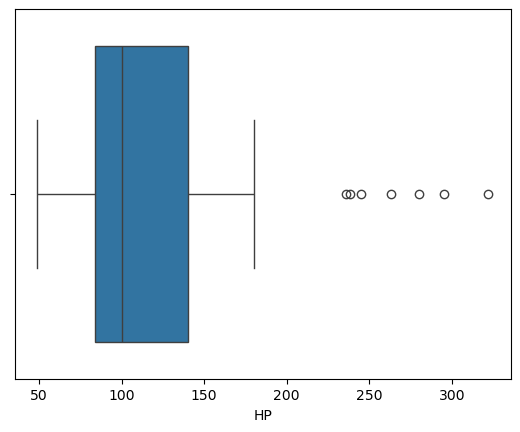

In [14]:
sns.boxplot(cars["HP"],orient='h')

<Axes: xlabel='HP', ylabel='Count'>

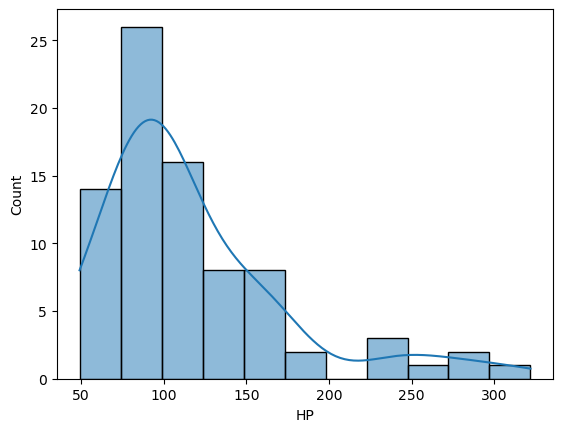

In [15]:
sns.histplot(cars["HP"],kde=True)

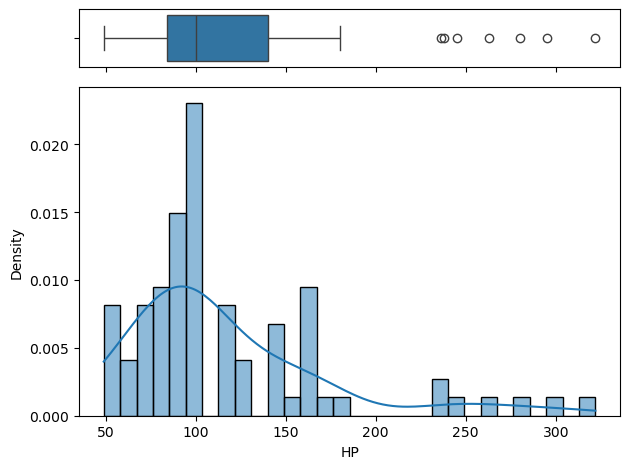

In [16]:
# Create a figure with two subplots (one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Creating a boxplot
sns.boxplot(data=cars, x='HP', ax=ax_box, orient='h')
ax_box.set(xlabel='')  # Remove x label for the boxplot

# Creating a histogram in the same x-axis
sns.histplot(data=cars, x='HP', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

# Adjust layout
plt.tight_layout()
plt.show()

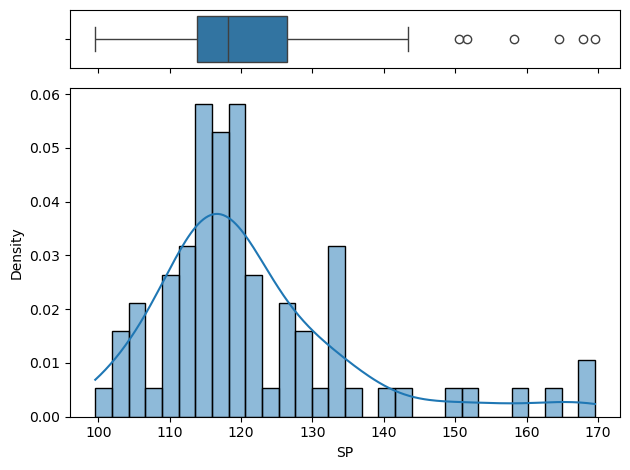

In [17]:
# Create a figure with two subplots (one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Creating a boxplot
sns.boxplot(data=cars, x='SP', ax=ax_box, orient='h')
ax_box.set(xlabel='')  # Remove x label for the boxplot

# Creating a histogram in the same x-axis
sns.histplot(data=cars, x='SP', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

# Adjust layout
plt.tight_layout()
plt.show()

In [18]:
# Print the correlation matrix
cars.corr(numeric_only=True)

,HP,VOL,SP,WT,MPG
HP,1.000000,0.077459,0.973848,0.076513,-0.725038
VOL,0.077459,1.000000,0.102170,0.999203,-0.529057
SP,0.973848,0.102170,1.000000,0.102439,-0.687125
WT,0.076513,0.999203,0.102439,1.000000,-0.526759
MPG,-0.725038,-0.529057,-0.687125,-0.526759,1.000000


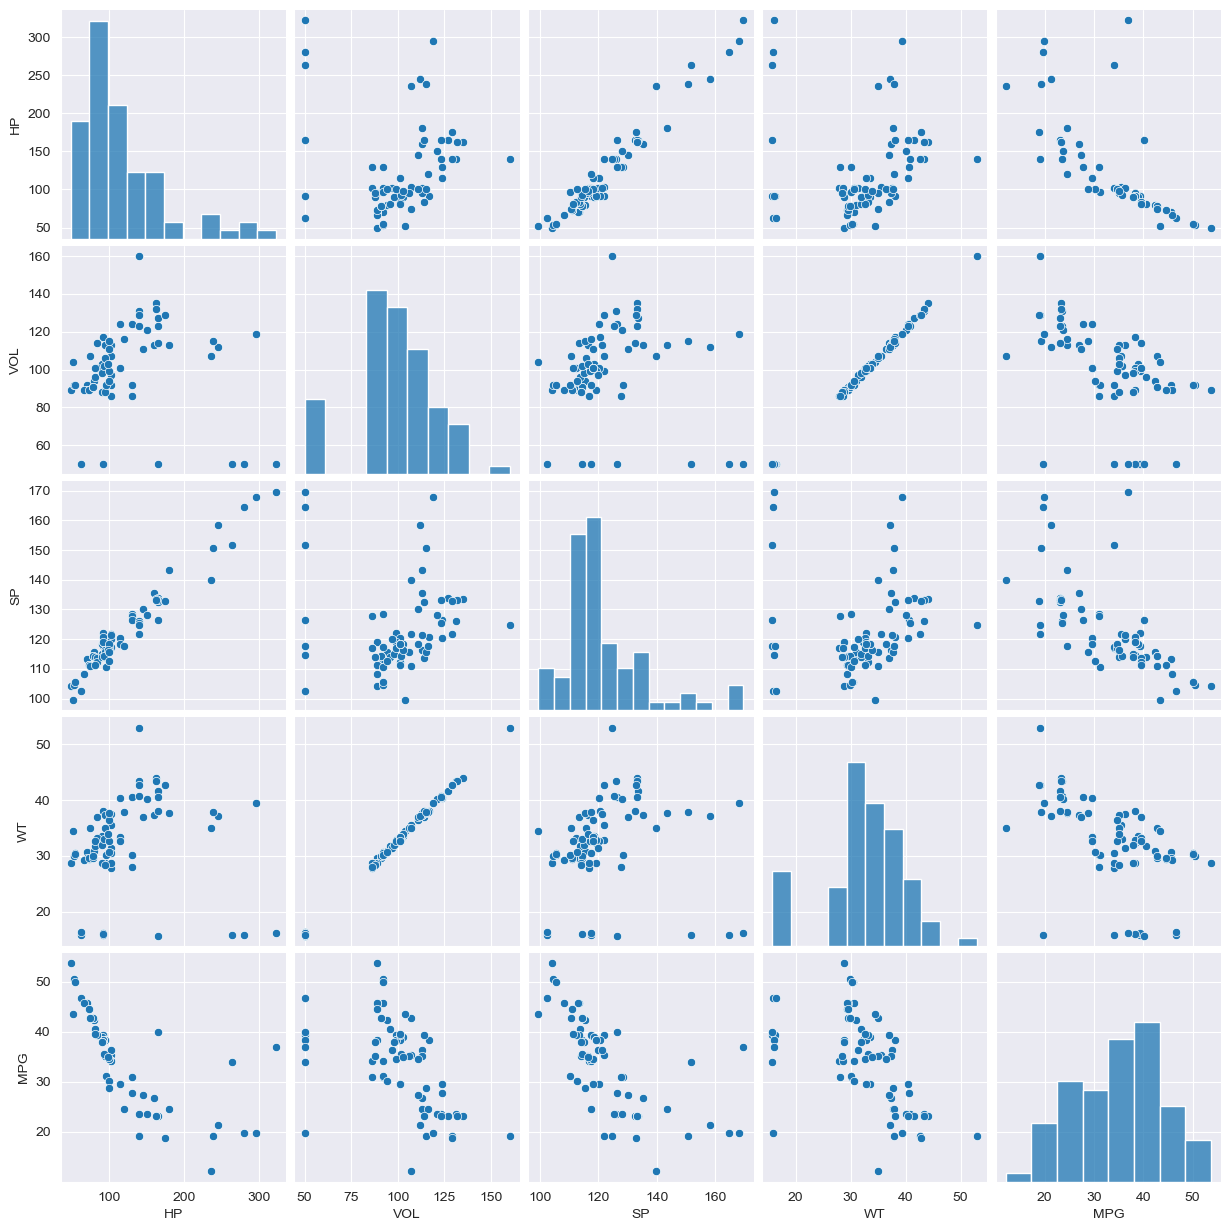

In [19]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [20]:
#check for missing values
cars.isna().sum()

HP     0
VOL    0
SP     0
WT     0
MPG    0
dtype: int64

#### Preparing a preliminary model with all X columns

In [22]:
#Build model
#import statsmodels.formula.api as smf 
model1 = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [23]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           1.54e-23
Time:                        21:09:55   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model1 Performance metrics

In [25]:
pred_y = model1.predict(cars)
pred_y

0     43.441935
1     42.388793
2     42.279341
3     42.538360
4     42.172648
        ...    
76    21.282096
77    17.899050
78    26.136453
79    12.316612
80    15.559481
Length: 81, dtype: float64

In [26]:
df1= pd.DataFrame()
df1["Predicted_y"]= pd.DataFrame(pred_y)
df1["actual_y"] =cars["MPG"]
df1

,Predicted_y,actual_y
0,43.441935,53.700681
1,42.388793,50.013401
2,42.279341,50.013401
3,42.538360,45.696322
4,42.172648,50.504232
...,...,...
76,21.282096,36.900000
77,17.899050,19.197888
78,26.136453,34.000000
79,12.316612,19.833733


In [27]:
# Estimation of mean squared error for model1

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse1 = mean_squared_error(df1["actual_y"], df1["Predicted_y"])
mse1

18.89714115234311

#### F-test in Multiple Linear Regression
In the context of multiple linear regression, the F-test is a statistical test used to determine whether there is a significant relationship between the dependent variable and the set of independent variables. It evaluates whether the explanatory variables, as a group, have a statistically significant impact on the dependent variable. This test essentially compares the variance explained by the model with the variance of the residuals.

The F-test checks the null hypothesis that a model with no independent variables fits the data as well as your model. The alternative hypothesis is that your model fits the data better than the intercept-only model.

Null Hypothesis (H0): The model with no independent variables fits the data as well as a model with one or more independent variables. In mathematical terms, this means that all regression coefficients are equal to zero, except for the intercept. This can be expressed as:
$$ H_0: \beta_1 = \beta_2 = \cdots = \beta_k = 0 $$

Alternative Hypothesis (H1): At least one of the regression coefficients is not zero, implying that the corresponding independent variable does make a significant contribution to explaining the variation in the dependent variable. This can be expressed as:
$$ H_1: \text{at least one } \beta_i \neq 0 \quad (i = 1, 2, \ldots, k) $$

Understanding the F-statistic
The F-statistic is calculated as the ratio of two variances:

The variance explained by the model (Mean Square Regression, MSR).
The variance of the errors or residuals (Mean Square Error, MSE).
The formula for the F-statistic in multiple regression is:
$$ F = \frac{\text{MSR}}{\text{MSE}} = \frac{\frac{\text{SSR}}{k}}{\frac{\text{SSE}}{n-k-1}} $$

where:

1. SSR (Sum of Squares Regression) is the sum of the squares of the differences between the predicted values and the mean of the dependent variable.
2. SSE (Sum of Squares Error) is the sum of the squares of the residuals.
3. n is the number of observations.
4. k is the number of independent variables.

The F-statistic follows an F-distribution under the null hypothesis, and a significantly high value of F leads to the rejection of the null hypothesis, indicating that the model with the independent variables provides a better fit to the data than the model without them.




#### -------------------------------------------------------------------------------------------------------------------------------------------

#### Understanding the t and |p| values 
In the context of interpreting t-values and p-values in multiple linear regression, the hypothesis statements focus on testing whether each individual regression coefficient significantly differs from zero. This involves the following specific hypotheses for each coefficient in the model:

Null Hypothesis (H0): The null hypothesis states that the regression coefficient 
βi is equal to zero, suggesting that there is no effect of the predictor variable 
X on the dependent variable Y:βi =0

Alternative Hypothesis (H1): The alternative hypothesis states that the regression coefficient   βi is not equal to zero, indicating that the predictor variable Xi
does have an effect on the dependent variable Y. This is formally expressed as: βi!=0

So if the regression coefficients have to be significant the observed p values shall be 
less than 0.05


##### --------------------------------------------------------------------------------------------

#### Log-Likelihood 
Log-Likelihood is a measure of model fit. It is the logarithm of the likelihood function, which measures the probability of observing the data given the parameters of the model. In the context of OLS and other linear models, the likelihood function is often based on the assumption that the residuals are normally distributed. A higher log-likelihood value indicates a model with a better fit to the data. The log-likelihood can be conceptualized as the sum of the logs of the probabilities that the model assigns to the observed outcomes, under the model's assumptions.

#### Akaike Information Criterion (AIC)
AIC is a widely used criterion for model selection among a set of candidate models. It is based on the number of parameters in the model and the likelihood of the model. The formula for AIC is:
$$
\text{AIC} = 2k - 2\ln(L)
$$
where 
k is the number of estimated parameters in the model, and ln(L) is the log-likelihood of the model. The AIC penalizes the inclusion of additional parameters within the model; therefore, it balances model complexity and model fit. A lower AIC value indicates a better model.

#### Bayesian Information Criterion (BIC)
BIC is similar to AIC but includes a different penalty term for the number of parameters. The formula for BIC is:
$$
\text{BIC} = k \ln(n) - 2\ln(L)
$$

BIC imposes a larger penalty for the number of parameters than AIC, especially when the sample size n is large, making it more stringent against complex models. Like AIC, a lower BIC value indicates a better model.

In practice, when comparing several models, the ones with the lower AIC or BIC values are typically preferred. However, it's important to use these criteria in conjunction with other diagnostics

In [33]:
#Coefficients
model1.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [34]:
#t and p-Values
print(model1.tvalues, '\n\n', model1.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 

 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [35]:
#R squared values
(model1.rsquared,model1.rsquared_adj)

(0.7705372737359842, 0.7584602881431413)

### Multicollinearity Check
Multicollinearity in multiple linear regression refers to a situation where two or more predictor variables are highly correlated. This can lead to problems in estimating the coefficients of the model accurately, as it becomes difficult to disentangle the individual effects of the correlated predictors. Here are some common methods used to identify multicollinearity:

Correlation Matrix: A simple initial check involves computing the correlation coefficients between all pairs of predictors. High correlation coefficients (typically above 0.7 or below -0.7) suggest potential multicollinearity.

Variance Inflation Factor (VIF): VIF is a more precise method for detecting the level of multicollinearity. It measures how much the variance of an estimated regression coefficient increases if your predictors are correlated. If no factors are correlated, the VIFs will be 1.

Rule of Thumb: A VIF value greater than 10 indicates significant multicollinearity.

#### Calculating Variance Inflation Factor(VIF)
The VIF for each predictor is calculated as:
$$VIF_k = \frac{1}{1 - R^2_k}$$

This formula represents the VIF for the k-th predictor, where Rk  is the coefficient of determination obtained by regressing the k-th predictor on all other predictors. The VIF measures how much the variance of an estimated regression coefficient is increased because of collinearity.

In [37]:
# Display once again the head rows
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


In [38]:
# Compute VIF values

rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared  
vif_wt = 1/(1-rsq_wt) 

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared  
vif_vol = 1/(1-rsq_vol) 

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared  
vif_sp = 1/(1-rsq_sp) 

# Storing vif values in a data frame
d1 = {'Variables':['HP','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


#### By comparing  the VIF values, it is decided to drop WT column for further analysis and keep VOL column

#### Build Model2 with HP, VOL and SP as x-columns versus MPG

In [41]:
cars1 = cars.drop("WT", axis =1)

In [42]:
model2 = smf.ols('MPG~VOL+SP+HP',data=cars1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           1.56e-24
Time:                        21:09:55   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
SP             0.4007      0.156      2.571      0.012       0.090       0.711
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Performance of Model2

In [44]:
pred_y = model2.predict(cars1)
pred_y

0     43.590769
1     42.256794
2     42.256794
3     42.361497
4     42.269544
        ...    
76    21.233143
77    17.867725
78    26.216856
79    12.237554
80    15.592958
Length: 81, dtype: float64

In [45]:
df2= pd.DataFrame()
df2["Predicted_y"]= pd.DataFrame(pred_y)
df2["actual_y"] =cars1["MPG"]
df2

,Predicted_y,actual_y
0,43.590769,53.700681
1,42.256794,50.013401
2,42.256794,50.013401
3,42.361497,45.696322
4,42.269544,50.504232
...,...,...
76,21.233143,36.900000
77,17.867725,19.197888
78,26.216856,34.000000
79,12.237554,19.833733


In [46]:
# Estimation of mean squared error

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse2 = mean_squared_error(df2["actual_y"], df2["Predicted_y"])
mse2

18.91105338871122

### Model Deletion Diagnostics
#### Detecting Influencers/Outliers using Cook’s Distance

Cook's Distance is a commonly used measure to detect influential observations in a regression analysis. It evaluates how much a regression model's predictions would change if a specific observation were excluded from the analysis. Essentially, it helps in identifying points that have a disproportionate impact on the calculation of the regression coefficients.

##### Formula for Cook's Distance

The formula for Cook's Distance, \( D_i \), for the \( i \)-th observation is given by:
$$
\
D_i = \frac{(Y_i - \hat{Y}_i)^2}{p \cdot MSE} \cdot \frac{h_{ii}}{(1 - h_{ii})^2}
\
$$
Where:

- Yi is the observed response value for the \( i \)-th case.
- 𝑌̂  is the predicted response value for the \( i \)-th case based on the fitted model.
- \( p \) is the number of regression coefficients (including the intercept).
- \( MSE \) is the mean squared error of the regression model.
- \( h_{ii} \) is the leverage of the \( i \)-th observation, which measures the influence of that data point on its own prediction. 

### Interpretation

A high value of Cook's Distance indicates that the corresponding observation has a large influence on the fitted values. There isn't a strict universal threshold for what constitutes a "large" Cook's Distance, but a common rule of thumb is that observations with a Cook's Distance greater than \( 4/n \) (where \( n \) is the number of observations in the dataset) may be considered influential. However, the context and other diagnostics should also be considered when deciding on the influence of a data point based on its Cook's Distance.

In [49]:
cars1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   MPG     81 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.7 KB


### Plotting Cook's distance to identfy row wise outliers

In [51]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model2.get_influence()
(c, _) = model_influence.cooks_distance
c

array([4.43781421e-02, 2.31439849e-02, 2.31439849e-02, 5.50743307e-03,
       2.84029117e-02, 3.89961849e-03, 2.31439849e-02, 3.39659293e-03,
       3.39659293e-03, 9.67532550e-04, 3.00465895e-03, 9.32152031e-02,
       2.65177317e-04, 3.00465895e-03, 5.41784561e-03, 3.00465895e-03,
       8.22731925e-04, 9.32152031e-02, 8.22731925e-04, 3.21833541e-04,
       2.70620733e-05, 8.34770054e-03, 1.83348025e-05, 2.72860299e-04,
       1.23307010e-03, 7.41312614e-02, 5.71759163e-03, 2.70620733e-05,
       3.33387970e-02, 9.21393948e-05, 5.93913831e-03, 1.23367282e-03,
       2.67864467e-04, 1.10555542e-03, 1.21312479e-03, 2.01774924e-05,
       4.19374936e-04, 4.18657710e-03, 4.18657710e-03, 1.12077324e-02,
       2.70424384e-04, 3.80042521e-06, 1.99290460e-03, 2.64674273e-03,
       2.22196543e-05, 4.76293133e-04, 2.58868946e-05, 4.92204073e-05,
       1.55796817e-02, 3.53143210e-03, 3.53143210e-03, 3.53143210e-03,
       2.30754944e-05, 1.04055062e-02, 1.07199598e-03, 2.89811901e-04,
      

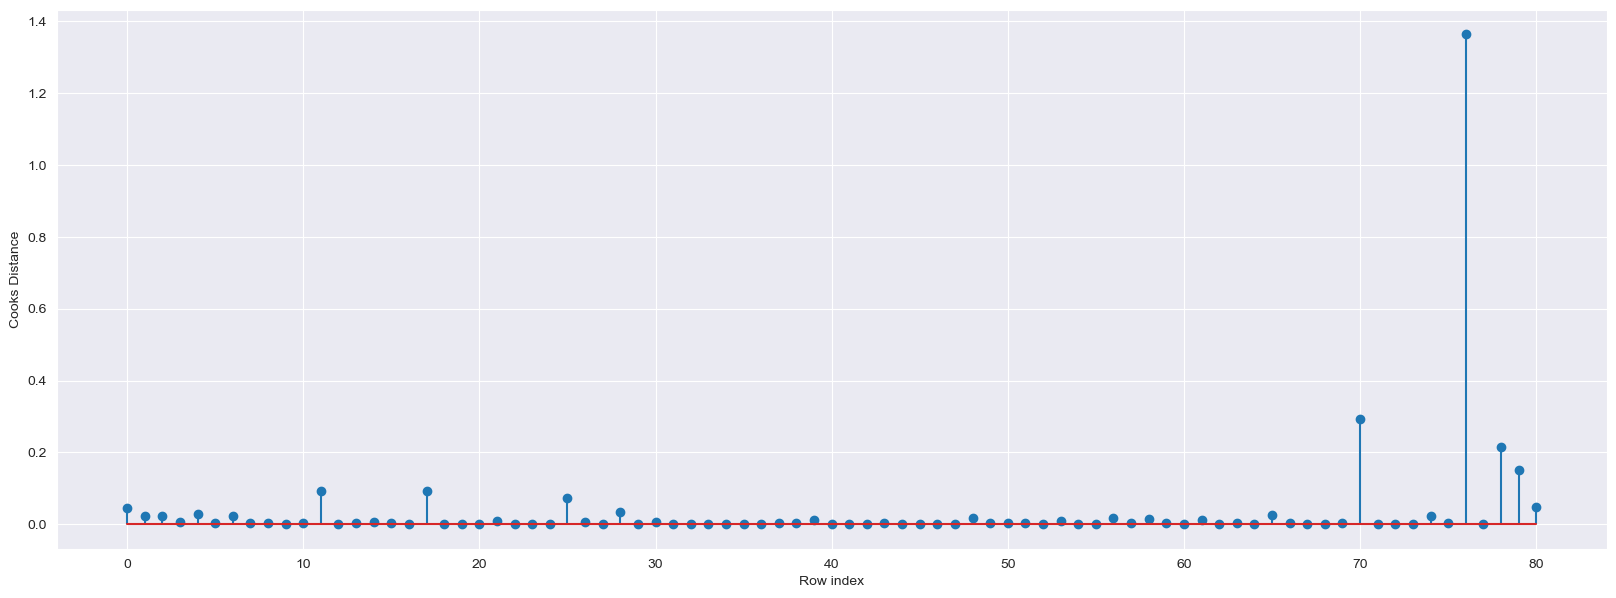

In [52]:
# Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [53]:
#The Cook's distance is considered high if it is greater than 0.5 and extreme if it is greater than 1
#index and value of influencer where c is more than .5
#(np.argmax(c),np.max(c))

## High Influence points

In [55]:
cars.shape

(81, 5)

#### Leverage (Hat Values):
Leverage values diagnose if a data point has an extreme value in terms of the independent variables. A point with high leverage has a great ability to influence the regression line. The threshold for considering a point as having high leverage is typically set at 3(p+1)/n, where p is the number of predictors and n is the sample size.

In [57]:
k = 3
n = 81
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.14814814814814814

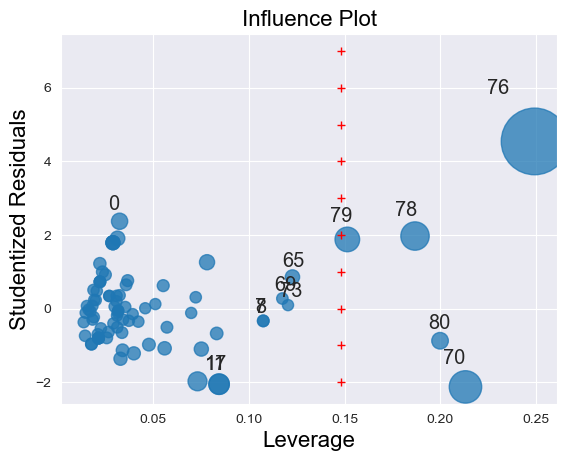

In [58]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model2,alpha=.05)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

<HTML>

<em color='green'><strong> From the above plot, it is evident that data points 70, 76,78,79,80 are the influencers as their H Leverage values are higher and size is higher (size is prportional to cook's distance)</em>


In [60]:
cars1[cars1.index.isin([65,69,70, 76,78,79,80])]

,HP,VOL,SP,MPG
65,165,50,126.598513,40.050000
69,245,112,158.300669,21.273708
70,280,50,164.598513,19.678507
76,322,50,169.598513,36.900000
78,263,50,151.598513,34.000000
79,295,119,167.944460,19.833733
80,236,107,139.840817,12.101263


In [61]:
#See the differences in HP and other variable values
cars1.head()

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232


# Improving the model

In [63]:
cars_new = pd.read_csv("Cars.csv", usecols=["HP","VOL","SP","MPG"])
cars_new.head()

,HP,MPG,VOL,SP
0,49,53.700681,89,104.185353
1,55,50.013401,92,105.461264
2,55,50.013401,92,105.461264
3,70,45.696322,92,113.461264
4,53,50.504232,92,104.461264


In [64]:
#Discard the data points which are influencers and reasign the row number (reset_index())

cars2=cars_new.drop(cars_new.index[[70, 76,78,79,80]],axis=0).reset_index(drop =True)

In [65]:
# This is the final dataset
cars2

,HP,MPG,VOL,SP
0,49,53.700681,89,104.185353
1,55,50.013401,92,105.461264
2,55,50.013401,92,105.461264
3,70,45.696322,92,113.461264
4,53,50.504232,92,104.461264
...,...,...,...,...
71,162,23.203569,132,133.140074
72,140,19.086341,160,124.715241
73,140,19.086341,129,121.864163
74,175,18.762837,129,132.864163


In [67]:
(final_ml_V.rsquared,final_ml_V.aic,final_ml_V.bic)

NameError: name 'final_ml_V' is not defined

##### Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

In [ ]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');
plt.show()

In [ ]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

In [ ]:
#Drop 65 and 69 observations
car2=car1.drop(car1.index[[65,69]],axis=0)

In [ ]:
car2

In [ ]:
#Reset the index and re arrange the row values
car3=car2.reset_index()

In [ ]:
car4=car3.drop(['index'],axis=1)

In [ ]:
car4

In [ ]:
#Build the model on the new data
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()

In [ ]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))


In [ ]:
# Drop the 73rd observation and reset the index
car5=car4.drop(car4.index[73],axis=0)

In [ ]:
car6=car5.reset_index()
car6

In [ ]:
car7=car6.drop(['index'],axis=1)

In [ ]:
car7

In [ ]:
#Check the accuracy of the model
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car7).fit()

In [ ]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car7)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
(final_ml_V.rsquared_adj,final_ml_V.aic)

In [ ]:
final_ml_V.summary()

In [101]:
# Build model3

model3 = smf.ols('MPG~VOL+SP+HP',data=cars2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     143.7
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           2.54e-30
Time:                        21:11:05   Log-Likelihood:                -198.04
No. Observations:                  76   AIC:                             404.1
Df Residuals:                      72   BIC:                             413.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.6589     12.198      1.694      0.095      -3.657      44.975
VOL           -0.1337      0.022     -6.207      0.000      -0.177      -0.091
SP             0.4851      0.132      3.684      0.000       0.223       0.748
HP            -0.2803      0.035     -8.094      0.000      -0.349      -0.211
==============================================================================
Omnibus:                       13.823   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.298
Skew:                           0.932   Prob(JB):                     0.000476
Kurtosis:                       4.163   Cond. No.                     6.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Predicting for new data

In [103]:
#New data for prediction

new_data=pd.DataFrame({'HP':40,"VOL":95,"SP":102,},index=[1])
new_data

,HP,VOL,SP
1,40,95,102


In [105]:
model3.predict(new_data)

1    46.227885
dtype: float64

In [107]:
pred_y = model3.predict(cars2)
pred_y

0     45.566815
1     44.102712
2     44.102712
3     43.778312
4     44.178306
        ...    
71    22.186380
72    20.524755
73    23.285030
74    18.808998
75    11.610636
Length: 76, dtype: float64

In [109]:
df3 = pd.DataFrame()
df3["Predicted_y"]= pd.DataFrame(pred_y)
df3["actual_y"] =cars2["MPG"]
df3

,Predicted_y,actual_y
0,45.566815,53.700681
1,44.102712,50.013401
2,44.102712,50.013401
3,43.778312,45.696322
4,44.178306,50.504232
...,...,...
71,22.186380,23.203569
72,20.524755,19.086341
73,23.285030,19.086341
74,18.808998,18.762837


In [111]:
# Estimation of mean squared error

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse3 = mean_squared_error(df3["actual_y"], df3["Predicted_y"])
mse3

10.738443300130696

In [113]:
rmse = np.sqrt(mse3)
rmse

3.276956408030277

In [115]:
# Estimation of mean absolute error
mae = mean_absolute_error(df3["actual_y"], df3["Predicted_y"])
mae

2.400639990319849

#### Checking the model health (assumptions)

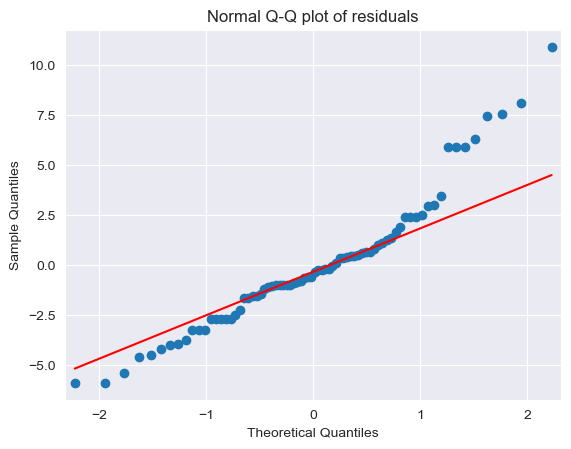

In [118]:
import statsmodels.api as sm

qqplot=sm.qqplot(model3.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

<Axes: ylabel='Count'>

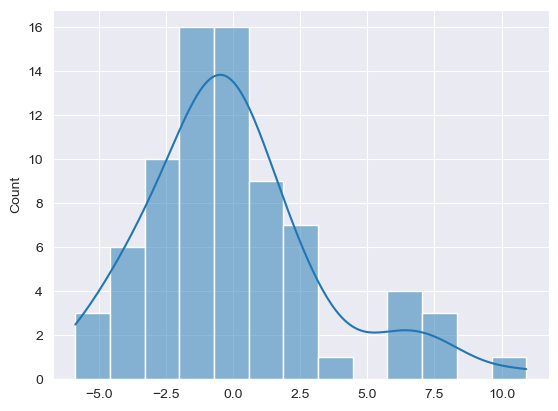

In [120]:
import seaborn as sns
sns.histplot(model3.resid, kde=True)

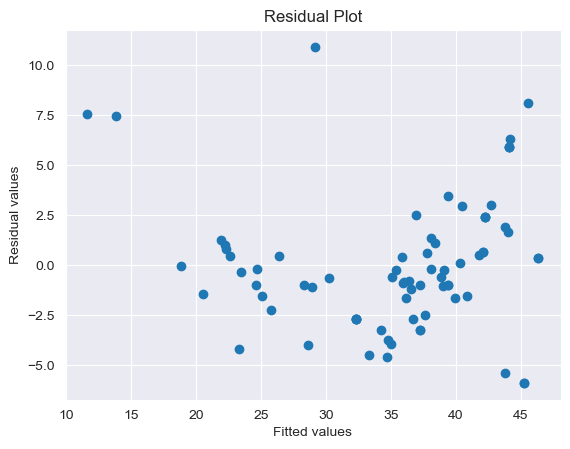

In [122]:
plt.scatter(model3.fittedvalues,model3.resid)

plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('Residual values')
plt.show()